## Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения круговой диаграммы, условие которой предварительно необходимо согласовать с преподавателем.

## Дан набор данных обзора показателей самоубийств с 1985 по 2016 год. Сравнивает социально-экономическую информацию с уровнем самоубийств по годам и странам.
<font size='3'>
<br> Задача: проанализировать соотношение полов по совершенным самоубийствам трех стран в возрасте от 15 до 24 лет.
</font>

### Импорт модулей

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Импорт данных

In [2]:
x = []
y = []
df = pd.read_csv('master.csv', encoding="UTF-8")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### Эти данные можно представить круговой диаграммой следующим образом:

<Figure size 128000x72000 with 0 Axes>

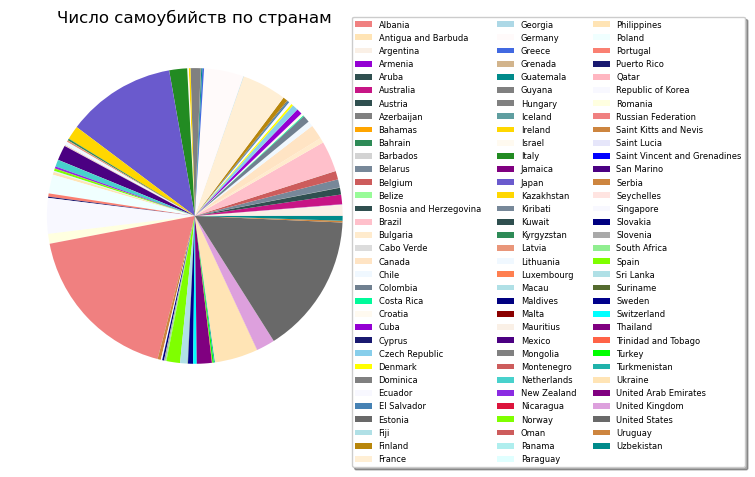

In [3]:
import random
import matplotlib.colors as mcolors

countries = df.loc[:,"country"]
countries = list(set(countries))
countries.sort()

su_sum = df.groupby(['country'])['suicides_no'].sum()
values = su_sum.tolist()

cs = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(countries))
plt.figure(figsize=(1280, 720))
explode = (0.1, 0.15)
labels = ["Женщины", "Мужчины"]
fig, ax = plt.subplots()
ax.pie(su_sum, colors=cs)
ax.legend(countries, loc="upper right", bbox_to_anchor=(2, 1.05), fontsize=6 ,ncol=3, fancybox=True, shadow=True)

plt.title("Число самоубийств по странам")
plt.show()

### Из исходного набора данных нас интересуют столбцы: Страна и год, поколение (Generation X) и пол. Составим из них датафрейм.

In [4]:
res = df.groupby(['country-year','sex', 'generation'], as_index=False)['suicides_no'].sum()
res

,country-year,sex,generation,suicides_no
0,Albania1987,female,Boomers,4
1,Albania1987,female,G.I. Generation,1
2,Albania1987,female,Generation X,14
3,Albania1987,female,Silent,6
4,Albania1987,male,Boomers,9
...,...,...,...,...
21341,Uzbekistan2014,male,Boomers,144
21342,Uzbekistan2014,male,Generation X,519
21343,Uzbekistan2014,male,Generation Z,60
21344,Uzbekistan2014,male,Millenials,665


### Отфильтруем значения датафрейма. В качестве стран данных для анализа возьмем статистические данные за 2015 год по странам: Россия, США и Германия.

In [5]:
res1 = res.loc[res['country-year'].isin(['Russian Federation2015']) & res['generation'].isin(['Generation X'])]
res2 = res.loc[res['country-year'].isin(['United States2015']) & res['generation'].isin(['Generation X'])]
res3 = res.loc[res['country-year'].isin(['Germany2015']) & res['generation'].isin(['Generation X'])]
print(res1, '\n', res2, '\n', res3)
x = res1['suicides_no'].values.tolist()
y = res2['suicides_no'].values.tolist()
z = res3['suicides_no'].values.tolist()
print(x, y, z)

                 country-year     sex    generation  suicides_no
16313  Russian Federation2015  female  Generation X         1391
16318  Russian Federation2015    male  Generation X         7898 
             country-year     sex    generation  suicides_no
20877  United States2015  female  Generation X         4053
20882  United States2015    male  Generation X        11634 
      country-year     sex    generation  suicides_no
7695  Germany2015  female  Generation X          800
7700  Germany2015    male  Generation X         2267
[1391, 7898] [4053, 11634] [800, 2267]


### Для наглядности построим круговую диаграмму по полученным данным.

<Figure size 3000x3000 with 0 Axes>

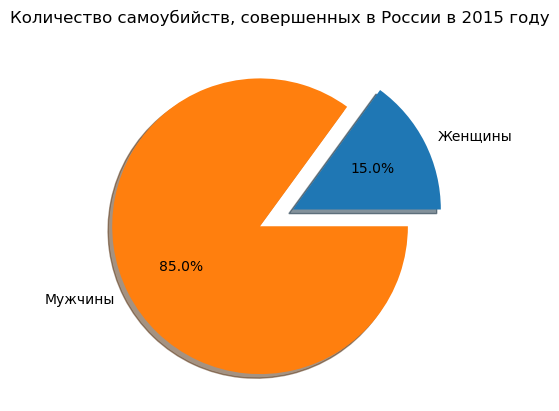

<Figure size 3000x3000 with 0 Axes>

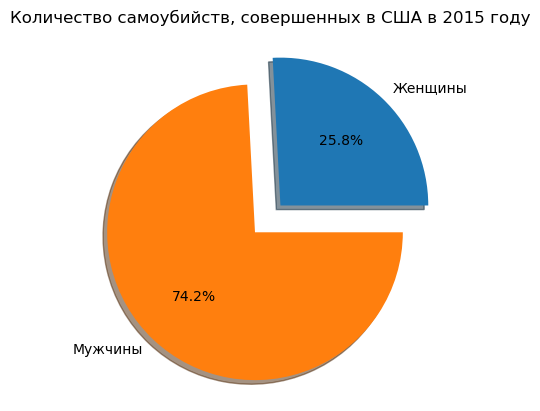

<Figure size 3000x3000 with 0 Axes>

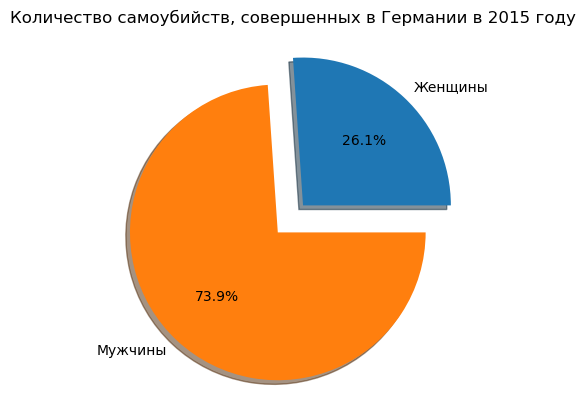

In [6]:
plt.figure(figsize=(30, 30))
explode = (0.1, 0.15)
labels = ["Женщины", "Мужчины"]
fig, ax = plt.subplots()
ax.pie(x, labels=labels, shadow=True, autopct='%1.1f%%',explode=explode)
plt.title("Количество самоубийств, совершенных в России в 2015 году")
plt.show()

plt.figure(figsize=(30, 30))
explode = (0.1, 0.15)
labels = ["Женщины", "Мужчины"]
fig, ax = plt.subplots()
ax.pie(y, labels=labels, shadow=True, autopct='%1.1f%%',explode=explode)
plt.title("Количество самоубийств, совершенных в США в 2015 году")
plt.show()

plt.figure(figsize=(30, 30))
explode = (0.1, 0.15)
labels = ["Женщины", "Мужчины"]
fig, ax = plt.subplots()
ax.pie(z, labels=labels, shadow=True, autopct='%1.1f%%',explode=explode)
plt.title("Количество самоубийств, совершенных в Германии в 2015 году")
plt.show()

### Из полученных результатов можно отметить следующее:
<ul>
<br> <li> В каждой из анализируемых стран большее количество самоубийств совершено мужчинами.
<br> <li> В России, показатели соотношения значительно отличаются.
</ul>